
# Storm Impact Prediction and Risk Analysis

## Objective
This project aims to analyze storm data to identify patterns, assess risk factors, and prepare the dataset for potential machine learning tasks such as storm severity classification or impact prediction.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:

# 2. Load the Dataset
df = pd.read_csv("storms.csv")
df.head()


,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011975,1975,6,24,12,32.5,-52.0,tropical depression,NaN,20,-999,-1998,-1998
1,AL011975,1975,6,24,18,32.6,-52.6,tropical depression,NaN,25,-999,-1998,-1998
2,AL011975,1975,6,25,0,32.7,-53.2,tropical depression,NaN,25,-999,-1998,-1998
3,AL011975,1975,6,25,60,32.8,-53.2,tropical depression,NaN,25,-999,-1998,-1998
4,AL011975,1975,6,25,12,33.0,-54.5,tropical depression,NaN,25,-999,-1998,-1998


In [41]:

# 3. Explore the Dataset

# Basic Information
print("=== Dataset Information ===")
print(df.info())

# Statistical Summary
print("\n=== Dataset Description ===")
print(df.describe())

# Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          22705 non-null  object 
 1   year                          22705 non-null  int64  
 2   month                         22705 non-null  int64  
 3   day                           22705 non-null  int64  
 4   hour                          22705 non-null  int64  
 5   lat                           22705 non-null  float64
 6   long                          22705 non-null  float64
 7   status                        22705 non-null  object 
 8   category                      5162 non-null   float64
 9   wind                          22705 non-null  int64  
 10  pressure                      22705 non-null  int64  
 11  tropicalstorm_force_diameter  22705 non-null  int64  
 12  hurricane_force_diameter      22

In [42]:
# Replace negative placeholder values across the entire DataFrame
df.replace([-999, -1998], np.nan, inplace=True)

# Fill missing values in the 'category' column
df['category'] = df['category'].fillna('Not Applicable')

# Now, let's check the missing values again to confirm our changes
print("\n=== Missing Values After Cleaning ===")
print(df.isnull().sum())


=== Missing Values After Cleaning ===
name                                0
year                                0
month                               0
day                                 0
hour                                0
lat                                 0
long                                0
status                              0
category                            0
wind                                0
pressure                         1918
tropicalstorm_force_diameter    11439
hurricane_force_diameter        11439
dtype: int64


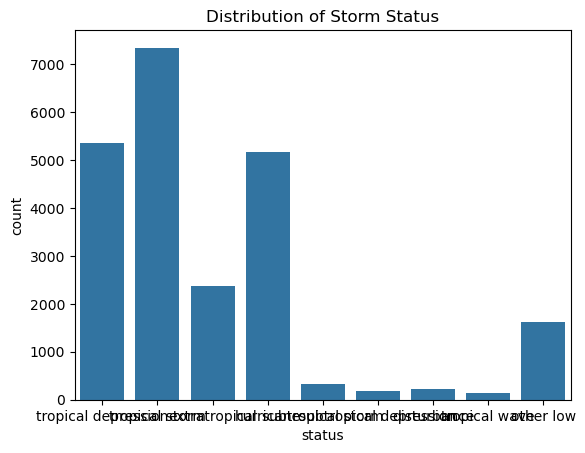

In [43]:
sns.countplot(x='status', data=df)
plt.title('Distribution of Storm Status')
plt.show()

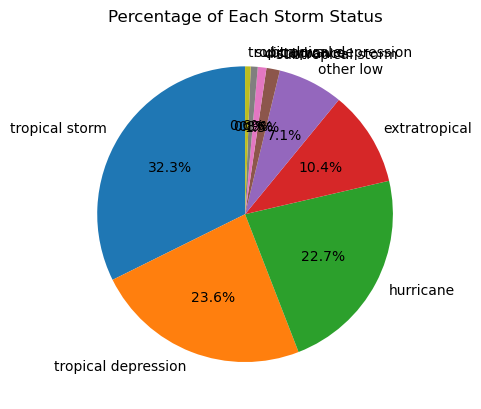

In [44]:
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Storm Status')
plt.show()

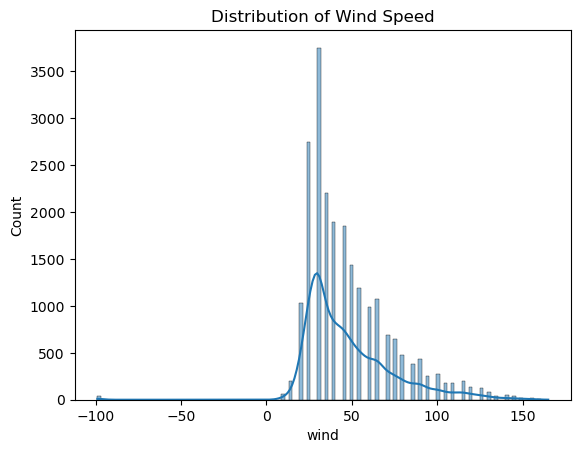

In [45]:
sns.histplot(df['wind'], kde=True)
plt.title('Distribution of Wind Speed')
plt.show()

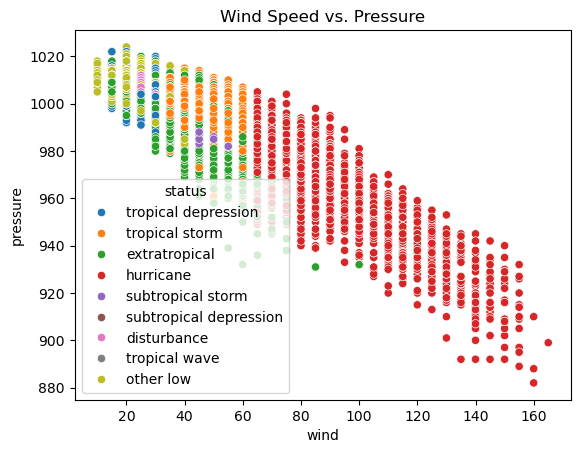

In [46]:
sns.scatterplot(x='wind', y='pressure', data=df, hue='status')
plt.title('Wind Speed vs. Pressure')
plt.show()

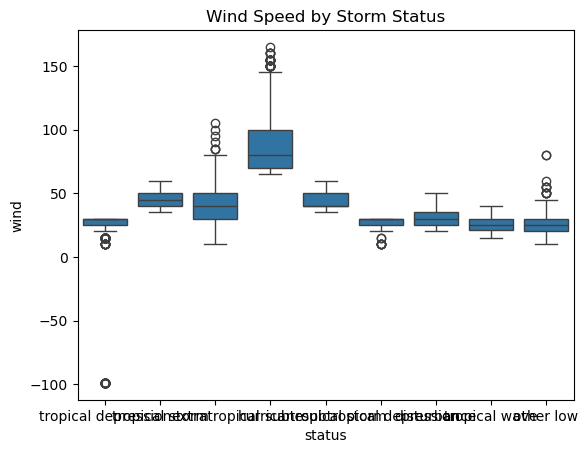

In [47]:
sns.boxplot(x='status', y='wind', data=df)
plt.title('Wind Speed by Storm Status')
plt.show()

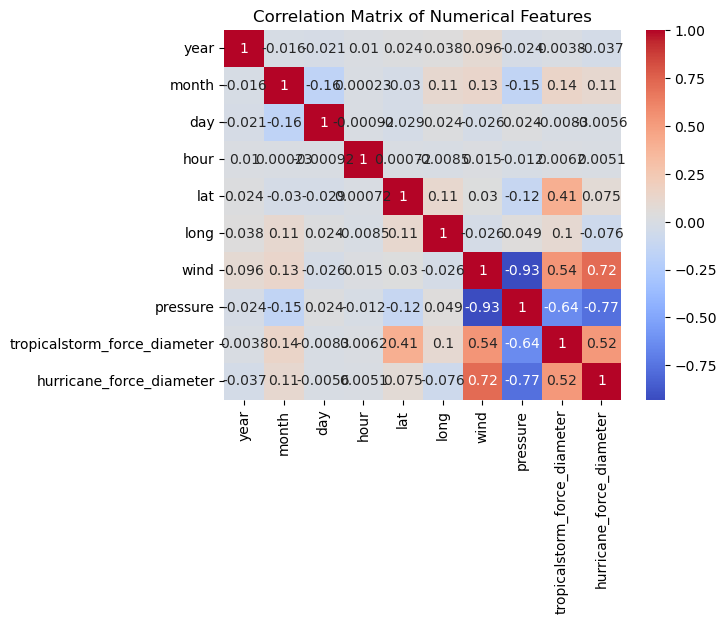

In [48]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [49]:
# Example: Dropping a column
df = df.drop(columns=['unnamed: 13'], errors='ignore')
# Example: Filling missing values (if any)
# df['pressure'] = df['pressure'].fillna(df['pressure'].median())

In [50]:
encoder = LabelEncoder()
df['status'] = encoder.fit_transform(df['status'])
# Other categorical columns like 'name' and 'category' would also be encoded or dropped

In [51]:
X = df[['lat', 'long', 'wind', 'pressure']] # Example features
y = df['status']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Impute missing values to handle any remaining NaNs
print("Imputing missing values...")
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Missing values in X_train after imputation:", np.isnan(X_train).sum())
print("Missing values in X_test after imputation:", np.isnan(X_test).sum())

# Now, train the model on the clean data
print("\nTraining LogisticRegression model...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model training completed successfully!")

Imputing missing values...
Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0

Training LogisticRegression model...
Model training completed successfully!


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
y_pred = model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8370402994935037


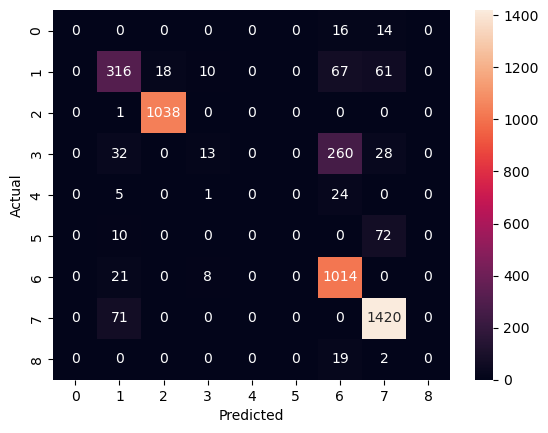

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.69      0.67      0.68       472
           2       0.98      1.00      0.99      1039
           3       0.41      0.04      0.07       333
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        82
           6       0.72      0.97      0.83      1043
           7       0.89      0.95      0.92      1491
           8       0.00      0.00      0.00        21

    accuracy                           0.84      4541
   macro avg       0.41      0.40      0.39      4541
weighted avg       0.79      0.84      0.80      4541



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:

# --- SAVE THE MODEL AND ENCODER ---

# 1. Save the trained logistic regression model
# This file will contain all the learned patterns from your data.
joblib.dump(model, 'storm_model.pkl')

# 2. Save the Label Encoder
# This is crucial for converting the numeric prediction (e.g., 0, 1, 2) back to text (e.g., 'tropical depression').
joblib.dump(encoder, 'storm_encoder.pkl')

print("Model and encoder saved successfully as storm_model.pkl and storm_encoder.pkl!")

Model and encoder saved successfully as storm_model.pkl and storm_encoder.pkl!
